![SEC logo](images/sec.jpeg)

# Dataset Simulation

In [116]:
import pandas as pd #For Data Manipulation
import numpy as np #For Numerical calculations
import matplotlib.pyplot as plt #For graphical representatibons
import seaborn as sns #For graphical representations
%matplotlib inline

## Investigating SEC Data

I took some summary statistics from the State Examinations Commission and put that data into a CSV file. This file contains the 2018 Leaving Cert Higher, Ordinary and Foundation Level results by gender, in Maths and English. I initially compared results in different subjects by gender, before settling on Leaving Cert Ordinary Level Maths. 

I am very familiar with the Leaving Cert Maths course and the factors influencing students attainment. I plan to investigate these factors, and simulate data to determine if my experiences and current research can be modelled effectively.

In [117]:
#Read SEC Data
df = pd.read_csv('data/2018lc-math-english.csv')
#Select Rows 8 to 15 and Columns 0 to 5
y = df.loc[8:15]
y = y.iloc[:, 0:5]

#Get rid of the existing index and replace with 1 to 9
#Now the index will match grade categories 
y = y.reset_index(drop = True)
y = y.set_index(np.arange(1, 9))

#Show df table
y

,Grade,Level,2018-total-maths,2018-female-maths,2018-male-maths
1,1,O,482,314,168
2,2,O,3392,1979,1413
3,3,O,6484,3524,2960
4,4,O,7551,3981,3570
5,5,O,6348,3260,3088
6,6,O,4062,1948,2114
7,7,O,1870,868,1002
8,8,O,1147,436,711


In [118]:
# Creating dfs for female and male students, and grades
fem_mat = pd.DataFrame(y.loc[:,'2018-female-maths'])
mal_mat = pd.DataFrame(y.loc[:,'2018-male-maths'])
grade = np.array(y.loc[:, 'Grade'])

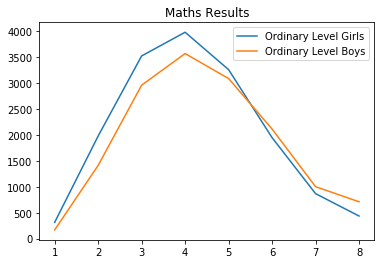

In [119]:
plt.title('Maths Results')
plt.plot(grade, fem_mat, label = 'Ordinary Level Girls')
plt.plot(grade, mal_mat, label = 'Ordinary Level Boys')
plt.legend()
plt.show()

In [120]:
# How many girls sat LCOL in 2018
totalgirl = (np.sum(fem_mat)).tolist()
print('The total number of female candidates: ', totalgirl)

The total number of female candidates:  [16310]


In [121]:
# How many boys sat LCOL in 2018
totalboy = (np.sum(mal_mat)).tolist()
print('The total number of male candidates: ', totalboy)

The total number of male candidates:  [15026]


In [122]:
# Total number of LCOL candidates
bestpupil = y.loc[:, '2018-total-maths']
sum_total = np.sum(bestpupil)

print('The total number of candidates: ', sum_total)

The total number of candidates:  31336


In [123]:
# Percentage of students achieving each grade
all_percents = pd.DataFrame(np.round(bestpupil/sum_total*100, decimals = 2))
print(all_percents)

   2018-total-maths
1              1.54
2             10.82
3             20.69
4             24.10
5             20.26
6             12.96
7              5.97
8              3.66


In [124]:
o4 = 1.538167+10.824611+20.691856+24.096885
print('Percentage of Students Awarded an O4 or higher grade: %0.2f %% ' % o4 )

Percentage of Students Awarded an O4 or higher grade: 57.15 % 


In [125]:
# Set x to be in the range 0 - 8
x = np.arange(0, 8)

In [126]:
#For rows 0 to 7 in female results, calculate %
bestgirl = (fem_mat.iloc[x])
print(np.round(bestgirl/totalgirl*100, decimals= 2))

   2018-female-maths
1               1.93
2              12.13
3              21.61
4              24.41
5              19.99
6              11.94
7               5.32
8               2.67


In [127]:
girls_o4 = 1.925199+12.133660+21.606376+24.408338
print('Percentage of Female Students Awarded an O4 or higher grade: %0.2f %% ' % girls_o4 )

Percentage of Female Students Awarded an O4 or higher grade: 60.07 % 


In [128]:
#For rows 0 to 7 in female results, calculate %
bestboy = (mal_mat.iloc[x])
meanboy = np.round(bestboy/totalboy*100, decimals = 2)
print(meanboy)


   2018-male-maths
1             1.12
2             9.40
3            19.70
4            23.76
5            20.55
6            14.07
7             6.67
8             4.73


In [129]:
boys_o4 = 1.118062+9.403700+19.699188+23.758818
print('Percentage of Students Awarded an O4 or higher grade: %0.2f %% ' % boys_o4)

Percentage of Students Awarded an O4 or higher grade: 53.98 % 


As the data I have here, is ordinal and categorical, I can't calculate the mean. From my percentages above, and the fact my data is ordered by descending grade awards, I can see that the median grade for both female and male is an O4.

In this year approximately 57% of students were awarded an O4 or higher grade. 

60% of female students received 04 or higher grades, and 54% of male students. 

## Simulating Data

From my investigation I have categorical ordinal data for the entire population, divided by gender. I know exactly what percentage of girls and boys achieve each grade boundary. Results vary from year to year but from a quick examination of previous years results, these proportions are fairly typical of Leaving Cert Ordinary Level Maths Results. 

I will begin my simulation by generating categorical data in the form of grades awarded to 100 female and 100 male students. I will then assign the relevant gender based on the grade I have generated. 

The choice of equal numbers of male and female students may cause my simulation to vary from the original dataset, which had a marginally higher percentage of female students.

### Generating grades and assigning gender of candidates

In [130]:
#Seed the random number generator
#This should ensure the same data every time this simulation is run.
np.random.seed(42)

In [131]:
np.random.seed(42)
grades = ['O8', 'O7', 'O6', 'O5', 'O4', 'O3', 'O2', 'O1']
#Use percentages above to assign the correct proportion of each grade to male and female students.
fem_grades = np.random.choice((grades), 100, p=[ 3/100, 5/100, 12/100, 1/5, 24/100, 22/100, 12/100, 1/50])
mal_grades = np.random.choice((grades), 100, p=[ 5/100, 7/100, 14/100, 21/100, 24/100, 19/100, 9/100, 1/100])

In [132]:
# Create dataframe df with female candidates result grades
df = pd.DataFrame(fem_grades, columns=['Result_grade'])
# Create dataframe df2 with male candidates result grades
df2 = pd.DataFrame(mal_grades, columns=['Result_grade'])
#Combining both datasets in same column of  df
#Note fem_grades will be found at index 0 - 99 and mal_grades now has index 100 - 199
df = df.append(df2, ignore_index=True)
df

,Result_grade
0,O5
1,O2
2,O3
3,O4
4,O6
5,O6
6,O7
7,O2
8,O4
9,O3


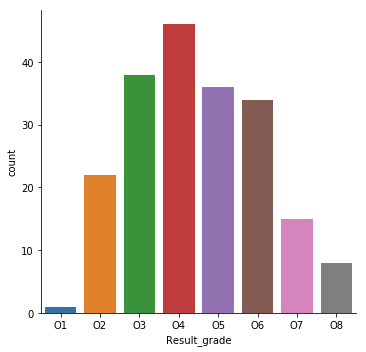

In [133]:
sns.catplot(x="Result_grade", kind="count", data=df, 
            order = ['O1', 'O2', 'O3', 'O4', 'O5', 'O6', 'O7', 'O8']);

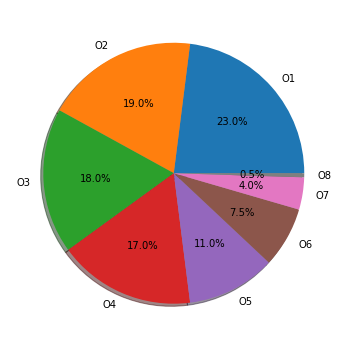

In [155]:
ax = plt.subplots(figsize = (8, 6))
labels = ['O1', 'O2', 'O3', 'O4', 'O5', 'O6', 'O7', 'O8']
sizes = df['Result_grade'].value_counts()
ax = plt.pie(sizes, labels=labels, autopct='%1.1f%%', shadow=True)
plt.show()
#https://www.datacamp.com/community/tutorials/categorical-data

Now that I have 200 grades simulated for 100 female candidates and 100 male candidate, I need to assign my second variable, gender. 

By design, I know that my first 100 data points are female candidates and the second 100 are male. 

In [135]:
# Generating dfs with 100 strings, first female, then male
string_female = pd.DataFrame(['female']*100)
string_male = pd.DataFrame(['male']*100)
# Combining both dfs to the same df column, named gender
gender = string_female.append(string_male, ignore_index=True)

In [136]:
# Adding gender col to existing df
df['Gender'] = gender

In [137]:
df

,Result_grade,Gender
0,O5,female
1,O2,female
2,O3,female
3,O4,female
4,O6,female
5,O6,female
6,O7,female
7,O2,female
8,O4,female
9,O3,female


### Generating results that fit the grade intervals

I know from my research that very often assessment results are normally distributed. That isn't the case at Leaving Cert Ordinary Level Maths. I initially tried to simulate my results with a normal distribution and found that I was getting either getting too many fails, and not enough 01 and O2 grades, or vice versa. 

To solve this problem, I began by generating grades and now that I have 200 grades I can work backward and generate each candidates marks. I know the grade boundaries for each of the eight grades awarded and I know that frequency of each grade in my simulation. 

In [138]:
#Printing the count for each grade in my df
df['Result_grade'].value_counts(sort=False)

O1     1
O6    34
O5    36
O3    38
O8     8
O7    15
O2    22
O4    46
Name: Result_grade, dtype: int64

I'm going to use the grade to generate a random mark in the interval for that grade. I've chosen to generate random marks from the Uniform Distribution. This is in part because there is no data on how marks are distributed across grade boundaries. 

I have changed one of the grade boundaries slighlty, so my results more closely resemble Leaving Cert results. The lowest grade O8 will contain marks from 60 to 179. I made this decision as in my professional research, it is extremely rare for a candidate to score lower than 60 marks in a Leaving Cert Ordinary Level Maths exam. 

In [139]:
#Create a new col, Result with zeros in each row
df['Result'] = np.zeros(200)

In [140]:
np.random.seed(42)
#Using the count and grade boundaries for each grade, I'm going to ppopulate Result with uniformly distributed results
df['Result'].mask(df['Result_grade']=='O1', np.random.randint(540, 600, 1), inplace=True)
df['Result'].mask(df['Result_grade']=='O2', np.random.randint(480, 540, 22), inplace=True)
df['Result'].mask(df['Result_grade']=='O3', np.random.randint(420, 480, 38), inplace=True)
df['Result'].mask(df['Result_grade']=='O4', np.random.randint(360, 420, 46), inplace=True)
df['Result'].mask(df['Result_grade']=='O5', np.random.randint(300, 360, 36), inplace=True)
df['Result'].mask(df['Result_grade']=='O6', np.random.randint(240, 300, 34), inplace=True)
df['Result'].mask(df['Result_grade']=='O7', np.random.randint(180, 240, 15), inplace=True)
df['Result'].mask(df['Result_grade']=='O8', np.random.randint(60, 180, 8), inplace=True)

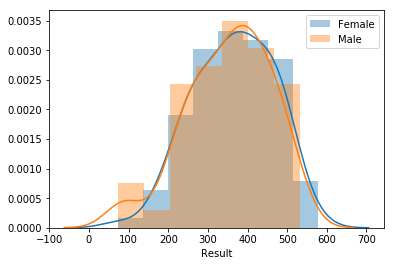

In [141]:
girls = df.loc[(df['Gender'] == 'female')]
boys = df.loc[(df['Gender'] == 'male')]

sns.distplot(girls['Result'], label = 'Female');
sns.distplot(boys['Result'], label = 'Male');
plt.legend();

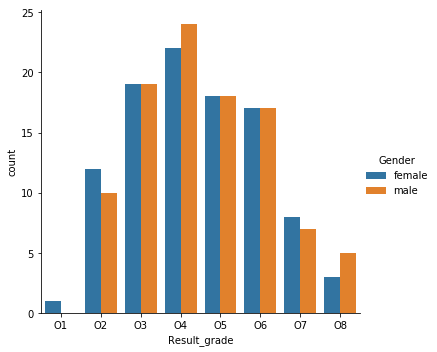

In [142]:
sns.catplot(x="Result_grade", hue="Gender",
                 data=df, kind="count", order = ['O1', 'O2', 'O3', 'O4', 'O5', 'O6', 'O7', 'O8']);
#https://stackoverflow.com/questions/44067951/sorting-categorical-labels-in-seaborn-chart

### Generating categorical data for how Leaving Certs spend their free time

Now that I have 200 results for students, I will start to add other variables that may or have been found to impact student attainment. 

The next variable I will examine is time spent studying versus other activities. 

In sixth year 60% of young women compared with 28% of young men report that they spend most of their free time studying. 

In [143]:
# Strings to represent the percentage of each
girls_study = (['study']*60)
girls_dont = (['other']*40)
boys_study = (['study']*28)
boys_dont = (['other']*72)

In [144]:
# Combining the four lists of strings into one dataframe, df_
df_ = pd.DataFrame({'Freetime':girls_study})
df3 = pd.DataFrame({'Freetime':girls_dont})
df_ = df_.append(df3, ignore_index=True)
np.random.RandomState(42)
df_ = df_.sample(frac=1)
#https://stackoverflow.com/questions/29576430/shuffle-dataframe-rows
df_.reset_index()

df3 = pd.DataFrame({'Freetime':boys_dont})
df4 = pd.DataFrame({'Freetime':boys_study})
df4 = df4.append(df3, ignore_index=True)
df4 = df4.sample(frac=1)
df4.reset_index()

df_ = df_.append(df4, ignore_index=True)
freetime = pd.Series(df_['Freetime'])

In [145]:
# Joining df_ to simulation df
df['Freetime'] = freetime.values

#https://stackoverflow.com/questions/26666919/add-column-in-dataframe-from-list/38490727
df

,Result_grade,Gender,Result,Freetime
0,O5,female,344.0,study
1,O2,female,531.0,study
2,O3,female,463.0,study
3,O4,female,409.0,study
4,O6,female,280.0,other
5,O6,female,267.0,other
6,O7,female,194.0,study
7,O2,female,508.0,study
8,O4,female,417.0,study
9,O3,female,449.0,study


In [146]:
df.groupby(['Freetime']).describe()

Result                                                           
          count        mean         std   min    25%    50%     75%    max
Freetime                                                                  
other     112.0  353.562500  106.657048  72.0  275.5  362.0  434.75  578.0
study      88.0  365.386364   99.405177  74.0  285.0  374.0  441.00  537.0

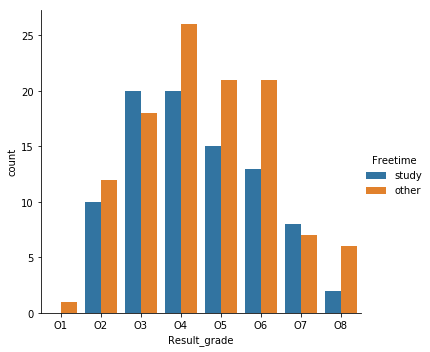

In [147]:
sns.catplot(x="Result_grade", hue="Freetime",
                 data=df, kind="count", order = ['O1', 'O2', 'O3', 'O4', 'O5', 'O6', 'O7', 'O8']);


### Generating numerical data measuring attendance

According to the Tusla School Attendance report (2015/2016), the average number of days missed by post-primary school students is 7.9% of 167 days, which works out at 13 days. This number includes all year groups, and is an average of days missed for students from 1st to 6th Year. 

As a result, I was wary of using this figure. There are a wide range of factors influencing attendance, which can result in Leaving Cert students having better or worse attendance than Junior Cycle students. In the same report, 15% of students were reported to have missed 20 days or more, but we have no way of identifying if that 15% came from Junior Cycle or Senior Cycle. 

As a result, I did some research of my own on the average number of days missed by Leaving Cert students. I discovered that between the start of 6th Year and 8th December, so the first term, a group of over 100 Leaving Certs had missed on average 7 days of school each. I'm afraid I can't share the data or my calculations here, but I can use this average to simulate the number of missed days for my cohort of 200 students. 

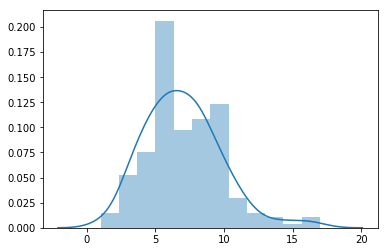

In [148]:
np.random.RandomState(42)
missed_days = pd.Series(np.random.poisson(7, 200))
sns.distplot(missed_days);
df['Missed_days'] = missed_days.values

I have used the Poisson distribution to model the number of days a student was absent. I chose this distribution as my data is numerical, discrete and I am aware of the average. 

It may not be technically correct, but I am using the distribution to calculate the number of days missed for a class of 200 students over the entire academic year. These events are independent, as the number of days one student misses is not impacted by another.  

In [149]:
df['Missed_days'].describe()

count    200.000000
mean       6.995000
std        2.813281
min        1.000000
25%        5.000000
50%        7.000000
75%        9.000000
max       17.000000
Name: Missed_days, dtype: float64

In [150]:
df

,Result_grade,Gender,Result,Freetime,Missed_days
0,O5,female,344.0,study,17
1,O2,female,531.0,study,3
2,O3,female,463.0,study,5
3,O4,female,409.0,study,7
4,O6,female,280.0,other,8
5,O6,female,267.0,other,3
6,O7,female,194.0,study,7
7,O2,female,508.0,study,10
8,O4,female,417.0,study,2
9,O3,female,449.0,study,5


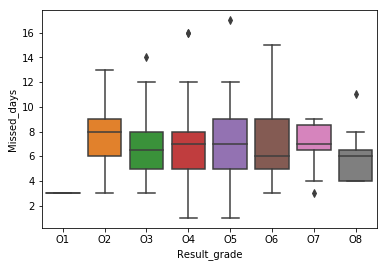

In [151]:
sns.boxplot(x = df['Result_grade'], y = df['Missed_days'], 
            order = ['O1', 'O2', 'O3', 'O4', 'O5', 'O6', 'O7', 'O8']);

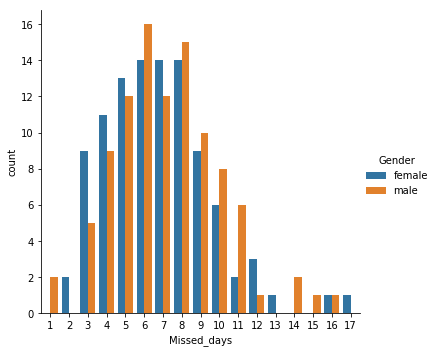

In [152]:
sns.catplot(x="Missed_days", hue="Gender",
                 data=df, kind="count");


### Problems Arising and Evaluation of Success

**Simulating Results:**
- I initially simulated my data using the np.random.normal function. My female data was generated with a mean of 340 and standard deviation of 100. My male data was simulated with a mean of 315 and the same standard deviation. I chose these different means as the results for female students were generally higher than for male students. I ran this simulation and found that my results showed higher rates of failure and smaller numbers of students achieving the top grades of O1 and O2. Looking at male and female candidates separately I found that both data sets had similar discrepancies. 

- Attempts to adjust this with a higher mean, lead to too many students getting the highest grade O1, while the other grades were more in line with my research. Similar problems when I adjusted the deviation. 

- As a result I chose to generate categorial data in the form of grades O1 to O8 using the proportion of results from 2018. I used the porportions of male and female results to generate 100 grades for each gender and then combined them. Accounting for a discrepancy in the proportion of girls vs. boys, my data was now broadly in line with what I'd expect to see.

- Next step assign numerical marks based on the grade a student was awarded. 


**Generating Categorical Freetime data:** 
- Once data was genereated, I plotted on a swarmplot to see if it matched acccepted research. It didn't; students who spent most of free time studying were actually less likely to pass. And students who didn't study were just as likely to get the highest grade. 
- I needed to find a way to match this data randomly, in such a way that students with the highest grade results would be more likely to spend most of their time studying.

In [153]:
df.describe()

,Result,Missed_days
count,200.00000,200.000000
mean,358.76500,6.995000
std,103.44022,2.813281
min,72.00000,1.000000
25%,278.75000,5.000000
50%,367.00000,7.000000
75%,440.00000,9.000000
max,578.00000,17.000000


## References

* [State Examinations Commission - Annual Exams Statistics](https://www.examinations.ie/statistics/?l=en&mc=st&sc=r11)
* [A Social Portrait of Children in Ireland](https://www.esri.ie/pubs/BKMNEXT097.pdf)
* [Tusla, School Attendance Data for Primary and Secondary School students(2015/2016)](https://www.tusla.ie/uploads/content/School_Attendance_Data_2015-16.pdf)